# 4. 신경망 학습

- **학습(Training)** 이란 훈련 데이터로 부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- **손실함수(Lost Function)** 는 신경망이 학습할 수 있도록 해주는 지표이며, 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표

## 4.1 데이터에서 학습한다!
- **기계학습은 데이터가 생명** : 데이터에서 답을 찾고, 데이터에서 패턴을 발견하고, 데이터로 이야기를 만드는 것이 기계학습. <br>
   기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로 부터 패턴을 찾으려 시도함
- 손글씨 이미지 인식 프로그램의 경우, 이미지에서 **특징/특성(Feature)** 을 추출하고 그 특징의 패턴을 기계학습 기술로 학습함. <br>
   "**특성**"이란 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 의미. 이미지의 특징은 벡터로 기술
- 기계학습에서도 이미지를 벡터로 변환할 때 사용하는 특성은 사람이 설계함. 반변, 신경망(딥러닝)에서는 특성까지도 기계가 스스로 학습함. <br>
   딥러닝을 "종단간 기계학습(end-to-end machine learning) 이라고도 함
- 데이터를 **훈련 데이터** 와 **시험 데이터** 로 나눠서, 훈련 데이터만으로 학습하여 최적의 매개변수를 찾고, 시험 데이터를 사용하여 훈련한 모델의 성능을 평가함. <br>
   이는 **범용 능력(일반화 성능)** 을 제대로 평가하기 위함. 범용 능력은 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력.
- 한 데이터 셋에만 지나치게 최적화된 상태(범용 능력이 떨어지는 상태)를 **오버피팅(overfitting, 과적합)** 이라 함

## 4.2 손실 함수

- 신경망 학습에서는 현재의 상태를 "하나의 지표"로 표현하고, 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색함. <br>
   신경망 학습에서 사용하는 지표를 **손실 함수(Lost Function)** 또는 **비용 함수(Cost Function)** 이라 함
<br>

### [평균 제곱 오차(mean squared error, MSE)]

- **평균 제곱 오차 수식** &nbsp;&nbsp;&nbsp;&nbsp; ----------- \[expression 4.1]
$$E = \frac{1}{2} \sum\limits_{k=0}^{m} (y_k - t_k)^{2}$$
> - **평균 제곱 오차는 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차($y_k - t_k$)를 제곱한 후, 그 총합을 구함**
> - $m$은 데이터의 차원 수(정답 레이블의 클래스 수, one-hot encoding의 차원 수), $k$는 데이터의 k 번째 차원
> - $y_k$는 신경망의 출력(신경망이 추정한 k번째 차원의 값), $t_k$는 정답 레이블의 k번째 차원의 값

In [1]:
# 평균 제곱 오차 구현
import numpy as np

def mean_squared_error(y, t):     # numpy array를 입력으로 받음 (y는 softmax 출력인 추정 값이고, t는 one-hot encoding 형태의 정답 레이블)
    return 0.5 * np.sum((y-t) ** 2)

In [2]:
# 임의의 데이터 예 (정답은 2, 추정은 인덱스 2를 가장 큰 값인 0.6으로 추정)
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(mean_squared_error(y, t))

# 임의의 데이터 예 (정답은 2, 추정은 인덱스 7를 가장 큰 값인 0.6으로 추정)
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(mean_squared_error(y, t))

0.09750000000000003
0.5975


- 위에서, 첫번째 예의 손실 함수가 두번째 예의 손실함수 보다 작아서 추정결과가 더 정답에 가까운 것으로 판단할 수 있음

### [교차 엔트로피 오차(cross entopy error, CEE)]

- **교차 엔트로피 오차 수식**  &nbsp;&nbsp;&nbsp;&nbsp; ----------- \[expression 4.2]
$$E = - \sum\limits_{k=0}^{m} t_k \log {y_k}$$
> - $m$은 데이터의 차원 수(one-hot encoding 값의 인덱스 수), $k$는 데이터의 k 번째 차원, $log$는 밑이 $e$인 자연로그($\log_e$)
> - $y_k$는 신경망의 출력(신경망이 추정한 k번째 차원의 값), $t_k$는 정답 레이블의 k번째 차원의 값(one-hot encoding 값 중 k번째 인덱스의 값)
> - 실질적으로, **정답일 때의 추정 값($t_k$가 1인 차원의 $y_k$)에 대한 자연로그를 계산함** <br>
      정답이 아닌 나머지 레이블 값은 $t_k$가 0 이므로, $\log y_k$와 곱해도 0 이 되어 합한 결과에 영향을 주지 않음. <br>
      즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨

In [3]:
# 자연 로그 y = log x 의 그래프
import matplotlib.pyplot as plt

x = np.arange(0, 1, 0.001)
y = np.log(x + 1e-7)          # log 0 에러 메시지를 없애기 위해 지수에 아주 작은 값(1e-7)을 더해줌

plt.plot(x, y)
plt.ylim(-5, 0)
plt.xlim(0, 1)
plt.xlabel("x")
plt.ylabel("log x")

Text(0, 0.5, 'log x')

- 위 그림에서 보듯이 로그함수는 x가 1일 때 $\log x$는 0 이 되고, x가 0에 까워질수록 $\log x$의 값은 점점 작아짐

Text(0, 0.5, '- log yk (출력값의 자연로그 * 마이너스)')

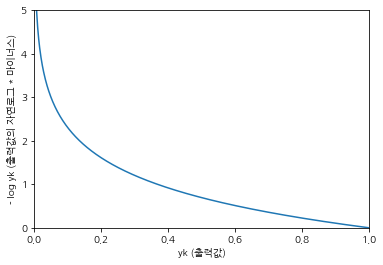

In [4]:
y = - np.log(x + 1e-7)

plt.plot(x, y)
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.xlabel("yk (출력값)")
plt.ylabel("- log yk (출력값의 자연로그 * 마이너스)")

- \[expression 4.2]은 $\log$ 값에 마이너스(-)를 곱해서 위의 그림과 같은 그래프가 됨
- 정답에 해당하는 출력($y_k$)이 커질수록 0에 가까워지다가, 그 출력이 1일 때 0 이 됨 (손실함수 E 가 최소가 됨)

In [5]:
# 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))   # np.log 계산 결과가 마이너스 무한대(-inf) 값이 되는 것을 막기 위해 아주 작은 값(0.0000001)

In [6]:
# 임의의 데이터 예 (정답은 2, 추정은 인덱스 2를 가장 큰 값인 0.6으로 추정)
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(cross_entropy_error(y, t))

# 임의의 데이터 예 (정답은 2, 추정은 인덱스 7를 가장 큰 값인 0.6으로 추정)
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(cross_entropy_error(y, t))

0.510825457099338
2.302584092994546


- 위에서, 첫번째 예의 교차 엔트로피 오차가 두번째 예의 교차 엔트로피 오차 보다 작아서 추정결과가 더 정답에 가까운 것으로 판단할 수 있음

### [전체 훈련 데이터 셋에 대한 손실 함수(교차 엔트로피 오차)의 합]

- **전체 훈련 데이터 셋에 대한 손실 함수(교차 엔트로피 오차) 수식** &nbsp;&nbsp;&nbsp;&nbsp; ---- \[expression 4.3]

$$E = - \frac{1}{N} \sum\limits_{n=0}^{N} ( \sum\limits_{k=0}^{m} t_{nk} \log y_{nk} )$$

> - $N$은 입력 데이터 수, $n$은 입력 데이터 중 n번째 데이터, $k$는 n번째 데이터에 대한 정답 레이블(또는 추정 값)의 k 번째 차원
> - $y_{nk}$는 신경망의 출력(n번째 데이터에 대한 k번째 차원의 값), $t_{nk}$는 정답 레이블(n번째 데이터에 대한 k번째 차원의 값)
> - $m$은 데이터 셋 하나의 차원 수(one-hot encoding 값의 인덱스 수), $log$는 밑이 $e$인 자연로그($\log_e$)
> - **데이터 셋 별로 손실 함수를 계산 후, 전체 데이터의 손실함수를 합한 후 $N$으로 나눔으로써 전체 데이터 셋에 대한 "평균 손실 함수"를 구함**

- **미니 배치(mini-batch) 학습** : 데이터 셋이 많은 경우, 훈련 데이터 중 일부 만을 이용하여 전체의 '근사치'를 학습하는 방법

In [7]:
# MNIST dataset 읽어오기
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, one_hot_label=True)    # 정답 레이블을 one-hot encoding 형태로 읽어옴(정답 레이블 만 1, 나머지는 0)

print(X_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [8]:
# 10개의 미니 배치 선택하기
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

In [9]:
# 배치용 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):     # y는 신경망의 출력(Softmax 출력, 즉 클래스 별 확율), t는 정답 레이블(one-hot encoding) : y와 t는 shape가 동일함
    delta = 1e-7
    if y.ndim == 1:                         # y와 t가 1차원 배열(1개의 데이터)인 경우, matrix 형태([행, 열])로 변경하여 2차원 배열(배치 데이터)와 shape을 통일시켜줌
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]          # 데이터의 수
    return -np.sum(t * np.log(y + delta)) / batch_size

In [10]:
t = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])

print(cross_entropy_error(y, t))

0.510825457099338


In [11]:
# 배치용 교차 엔트로피 오차 구현 (정답 레이블이 원-핫 인코딩이 아닌 경우)
def cross_entropy_error(y, t):     # y는 신경망의 출력(Softmax 출력, 즉 클래스 별 확율), t는 정답 레이블(숫자 값)
    delta = 1e-7
    if y.ndim == 1:                         # y와 t가 1차원 배열(1개의 데이터)인 경우, matrix 형태([행, 열])로 변경하여 2차원 배열(배치 데이터)와 shape을 통일시켜줌
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]          # 데이터의 수
    return -np.sum(np.log(y[np.arange(batch_size), t] + delta)) / batch_size

- \[expression 4.2]의 설명처럼, 교차 엔트로피 오차는 **정답일 때의 추정 값($t_k$가 1인 차원의 $y_k$)에 대한 자연로그를 계산** 하는 것이기 때문에 <br>
   $y$에서 정답 레이블의 차원 값만 선택하면 원하는 결과가 됨 ($t_{nk}$를 곱하는 것이 아니라, $y$에서 $t_{nk}$ 위치 값을 선택하면 됨)
- np.arange(batch_size)는 0부터 batch_size -1 까지 배열을 생성 : batch_size가 5이면 [0, 1, 2, 3, 4] 라는 numpy 배열을 생성
- t에는 정답 레이블이 [2, 7, 0, 9, 4] 처럼 저장되어 있으므로, y[np.arange(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출함. <br>
   예로, [y[0,2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]] 인 numpy 배열을 생성 --> [0번째 데이터의 2번째 차원의 값, 1번째 데이터의 7번째 차원의 값, ... ]

In [12]:
t = np.array([2, 7])
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])

print(cross_entropy_error(y, t))

0.510825457099338


- 궁극적인 목적은 높은 "정확도"를 끌어내는 매개변수 값을 찾는 것이지만, 정확도를 지표로 삼지 않고 손실함수를 지표로 사용함
- 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실함수의 값을 가능한 한 작게 하는 매개변수 값을 찾음. <br>
   가중치 매개변수의 손실함수를 미분(기울기를 계산) 하고, 그 미분 값을 단서로 매개변수 값을 서서히 갱신하는 과정을 반복함
    - 가중치 매개변수의 손실함수 미분은 "가중치 매개변수의 값을 아주 조금 변화 시켰을 때, 손실함수의 기울기를 계산" 하는 것
- 정확도를 지표로 삼아서는 안되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문. <br>
   정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화함
- 정확도는 테스트 데이터에 대해 추론(predict) 한 결과가 어느 정도 정확한지를 나타내는 지표로 사용함 (학습단계 지표로는 사용하지 않음)

## 4.3 수치 미분

- **미분은 한 순간의 변화량을 표시한 것** &nbsp;&nbsp;&nbsp;&nbsp; \[expression 4.4]

$$\frac{df(x)}{dx} = \underset{h \to 0}\lim \frac{f(x+h) - f(x)}{h}$$

> - 좌변은 f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 기호. x의 작은 변화가 f(x)를 얼마나 변화 시키느냐를 의미

In [13]:
# 수치 미분(numerical differentiation)의 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

- "10e-50"는 반올림 오차 문제를 일으킴. 반올림 오차는 작은 값(가령 소수점 8자리 이하 값)이 생략되어 최종 계산 결과에 오차가 생기게 함. <br>
   너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 됨. **미세한 값 h로 $10^{-4}$ 정도의 값을 사용**하면 좋은 결과를 얻는다고 알려져 있음
- 진정한 미분은 x 위치의 함수의 기울기(접선)에 해당하지만, 위의 구현에서 미분은 (x+h)와 x 사이의 기울기에 해당함. <br>
   진정한 미분과 위의 구현 값은 엄밀히 일치하지 않음. 이 오차를 줄이기 위해 **(x+h)와 (x-h) 일 때의 함수 f의 차분을 계산**하는 방법을 사용함. <br>
   x를 중심으로 전후의 차분을 계산한다는 의미에서 **중심 차분** 또는 **중앙 차분** 이라 함

In [14]:
# 중심 차분을 이용한 수치 미분 구현
def numerical_diff(f, x):
    h = 1e-4      # 0.0001
    return (f(x+h) - f(x-h)) / (2 * h)

- 아주 작은 차분으로 미분을 구하는 것을 "**수치 미분**"이라 함
- 수식을 전개해 미분을 구하는 것은 "**해석적(analytic)**" 이라는 말을 이용하여 "**해석적 해**" 또는 "**해석적으로 미분을 구하다**" 등으로 표현 <br>
   가령 $y = x^2$ 의 미분은 $\frac{dy}{dx} = 2x$로 풀어낼 수 있음
- 해석적 미분은 오차를 포함하지 않는 진정한 미분 값을 구해줌

### [수치 미분의 예]
$y = 0.01x^2 + 0.1x$ &nbsp;&nbsp;&nbsp;&nbsp; ---- \[expression 4.5]

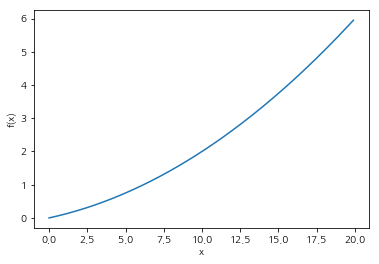

In [15]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [16]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


0.1999999999990898
0.2


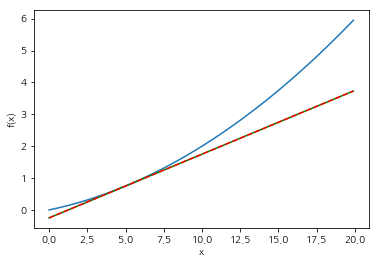

In [17]:
def tangent_line(f, x):     # 수치 미분 접선
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

def analytic_line(f, x):     # 해석적 해의 접선
    d = 0.02 * x + 0.1
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

tf = analytic_line(function_1, 5)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y2, c='g')
plt.plot(x, y3, "--", c='r')


- 해석적 해법과 수치 미분의 결과는 그 오차가 매우 작음. 실제로 거의 같은 값이라고 해도 될 만큼 작은 오차임
- 위의 그래프에서 x가 5일 때 해석적 해법과 수치 미분의 접선(빨간색 점선과 녹색 직선)이 거의 일치하여 겹쳐져 있음

### [편미분]

- **편미분은 변수가 여럿인 함수에 대한 미분**
- 변수가 2개인 함수의 편미분 예  &nbsp;&nbsp;&nbsp;&nbsp; ---- \[expression 4.6]

$$f(x_0, x_1) = x_0^2 + x_1^2$$

> - 편미분을 수식으로 $\frac{\delta f}{\delta x_0}$, $\frac{\delta f}{\delta x_1}$ 처럼 씀
> - 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함. 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정함

In [18]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2        # 아래에서 function_2 함수를 호출할 때 np.array([X, Y])를 인자로 전달했기 때문에 x[0]는 X, x[1]은 Y와 같음

Text(0.5, 0, 'z')

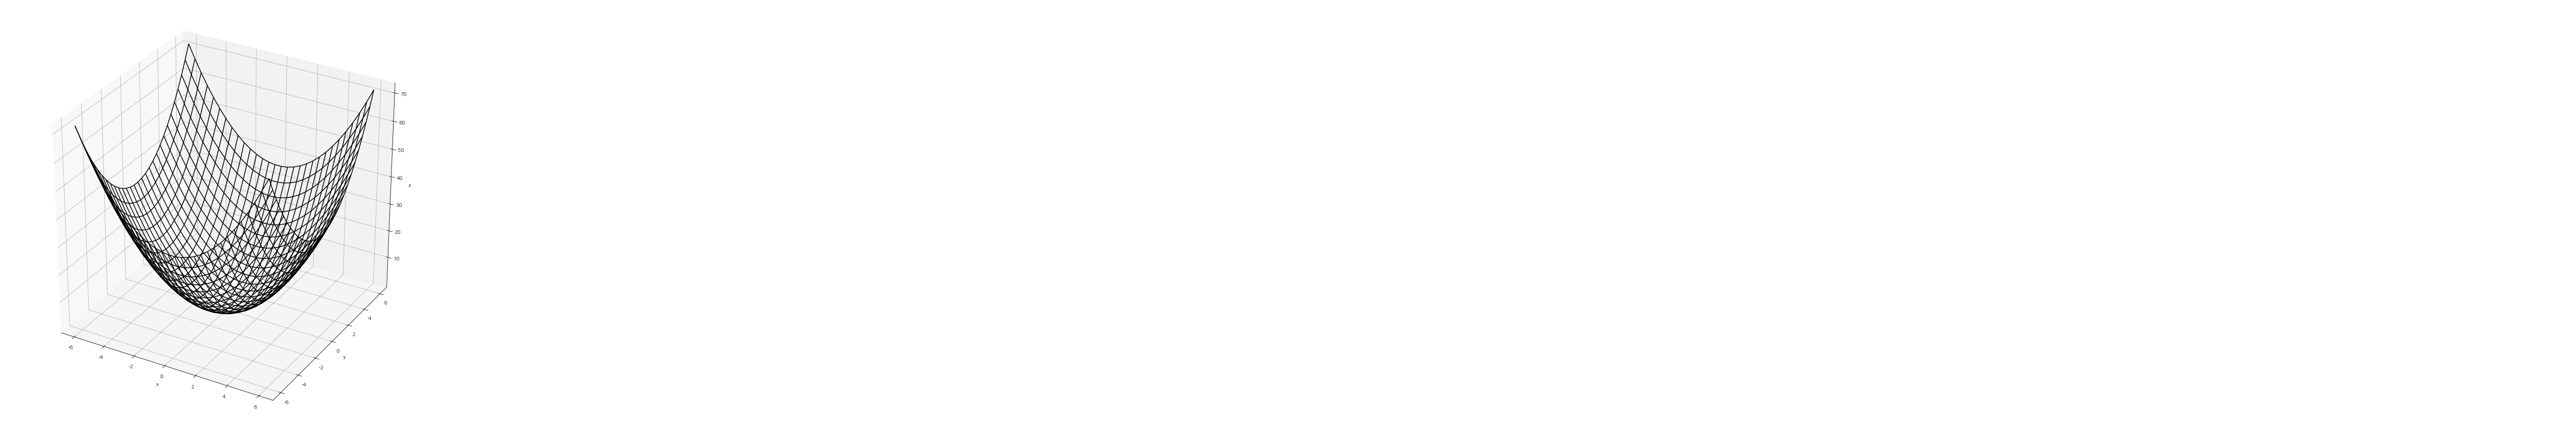

In [19]:
from mpl_toolkits.mplot3d import axes3d

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = function_2(np.array([X, Y]))

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [20]:
# x0에 대한 편미분 (x0=3, x1=4 일때)
def function_tmp0(x0):
    return x0 ** 2 + 4  ** 2       # x0는 변수, x1은 상수(고정된 값)로 재정의 된 함수

numerical_diff(function_tmp0, 3)

6.00000000000378

In [21]:
# x1에 대한 편미분 (x0=3, x1=4 일때)
def function_tmp1(x1):
    return 3 ** 2 + x1  ** 2       # x0는 상수(고정된 값), x1은 변수로 재정의 된 함수

numerical_diff(function_tmp1, 4)

7.999999999999119

## 4.4 기울기(gradient)

- 가령 $x_0 = 3, x_1 = 4$ 일 때 $(x_0, x_1)$ 양쪽의 편미분을 묶어서 $(\frac{\delta f}{\delta x_0}, \frac{\delta f}{\delta x_1})$ 처럼 **모든 변수의 편미분을 백터로 정리한 것**을 기울기라고 함

In [22]:
# 기울기 구현 : (x0, x1) 한 점에서의 기울기
def numerical_gradient_no_batch(f, x):     # f는 함수(수치 미분 함수), x는 numpy 배열이므로, numpy 배열 x의 각 원소에 대해서 수치 미분을 구함
    h = 1e-4
    grad = np.zeros_like(x)     # x와 형상(shape)가 같고, 그 원소가 모두 0인 배열 (기울기 저장을 위한 numpy 배열)

    for idx in range(x.size):   # x.size 는 데이터의 수
        tmp_val = x[idx]
        
        # f(x + h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val       # 값 복원
        
    return grad

In [23]:
print(numerical_gradient_no_batch(function_2, np.array([3.0, 4.0])))
print(numerical_gradient_no_batch(function_2, np.array([0.0, 2.0])))
print(numerical_gradient_no_batch(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


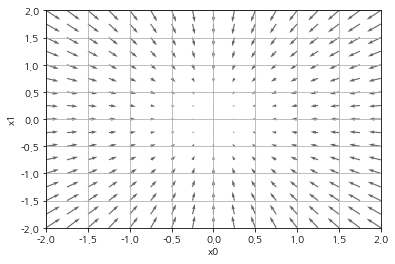

In [24]:
# 기울기에 마이너스를 붙인 벡터의 그래프 : (x0, x1) 전체 구간의 기울기
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):       # 모두 (x0, x1)에 대한 기울기를 구하기 위해 배치 처리
            grad[idx] = numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(X):
    if X.ndim == 1:
        return np.sum(X**2)
    else:
        return np.sum(X**2, axis=1)
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]))
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666") #,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

- 기울기 그림은 방향을 가진 벡터(화살표)로 그려지며, 기울기가 가리키는 쪽은 **각 장소에서 함수의 출력 값을 가장 줄이는  방향**(최종적으로는 가장 낮은 곳)
- 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐을 알 수 있음

### [경사법(경사 하강법)]

- **기울기를 이용해 손실함수의 최소값을 찾는 방법**
- 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기 이며, 기울기가 가리키는 곳에 정말 함수의 최소값이 있는지는 보장할 수 없음. <br>
   그 지점에서의 최소값으로 향하는 방향이지, 전체 최소값을 가리키는 방향 인지는 알 수 없음
- 기울기가 0인 안장점(어느 방향에서 보면 극대값이고, 다른 방향에서 보면 극소값이 되는 점) <br>
   또는 복잡하고 찌그러진 모양의 함수의 고원(국소적인 최소값)에서는 더이상 학습이 진행되지 않음
- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하며, 이동한 곳에서도 마찬가지로 기울기를 구하고, 그 기울어진 방향으로 나아가는 일을 반복함. <br>
   함수의 값을 점차 줄이는 것이 경사법(gradient method) 이며, <br>
   최소값을 찾는 방법이 **경사 하강법(gradient descent method)**, 최대값을 찾는 방법이 경사 상승법(gradient ascent method)
<br>

- **경사법 수식** &nbsp;&nbsp;&nbsp;&nbsp; ------ \[expression 4.7]

$$x_0 = x_0 - \eta \frac{\delta f}{\delta x_0}$$

$$x_1 = x_1 - \eta \frac{\delta f}{\delta x_1}$$

> - $x_0$와 $x_1$은 매개변수, $\frac{\delta f}{\delta x_0}$와 $\frac{\delta f}{\delta x_1}$은 기울기
> - $\eta$(에타)는 학습률(learning rate)라고 하며, 한 번에 얼마만큼 학습 해야 할지(매개변수 값을 얼마나 갱신할지)를 정하는 상수 : $\alpha$(알파)로도 표현함. <br>
     학습률 값은 0.01 이나 0.001 등 특정한 값을 정해야 하며, 이 값이 너무 크거나 작으면 최적의 장소(극소값)을 찾을 수 없음
> - 위의 식은 1회 학습에 해당하는 갱신이며, 이 단계를 반복함. <br>
     변수의 수가 2개인 경우의 식이며, 변수의 수가 늘어도 각 변수의 편미분 값으로 갱신하는 방법은 동일함

In [25]:
# 경사 하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):   # f는 최적화 하려는 함수, init_x는 초기값, lr은 learning rate, step_num은 경사법에 따른 반복 회수
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [26]:
# 경사법으로 f(x0, x1) = x0^2 + x1^2 의 최소값 구하기
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

- 위의 결과는 10의 -10승 이므로 거의 (0, 0)에 가까운 결과임. 최소값을 찾았음

Text(0, 0.5, 'X1')

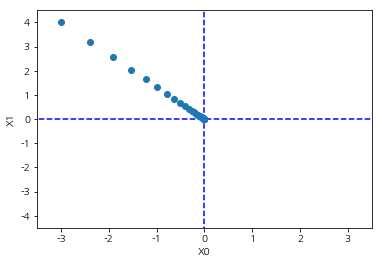

In [27]:
# 경사법에 의한 갱신 과정 그래프 : (x0, x1) 좌표의 궤적 그래프
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []      # 학습에 따른 (x0, x1) 좌표의 history를 저장하는 변수

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)  # lr 값을 변경 시켜 가면서 재 실행 해보면, 학습율에 따라 학습 궤적이 달라짐을 알 수 있음

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")

In [28]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)    # 최소 값을 찾지 못함 (발산)
print(x)

# 학습률이 너무 작은 예 : lr=1e-10
x, x_history = gradient_descent(function_2, init_x=init_x, lr=1e-5, step_num=100)    # 너무 조금 씩 갱신되어서 100번을 수행해도 거의 갱신되지 않음 
print(x)

[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]


- 학습률 같은 매개변수를 **하이퍼파라미터(hyper parameter, 초매개변수)** 라고 함
- 가중치와 편향 같은 신경망의 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 자동으로 획득되는 매개변수인 반면, <br>
   학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수 임
- 하이퍼파라미터는 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 함

### [신경망에서의 기울기]

- 신경망에서도 가중치 매개변수에 관한 손실 함수의 기울기를 구해야 함
- 형상이 $2 X 3$, 가중치는 $\matrix W$, 손실  함수가 $L$인 신경망의 경우, 경사는 $\frac{\delta L}{\delta \matrix W}$로 나타낼 수 있음
<br>

- **신경망의 기울기 수식** &nbsp;&nbsp;&nbsp;&nbsp; ---- \[expression 4.8]

$$\matrix W = \begin{bmatrix}
     W_{11} & W_{21} & W_{31} \\
     W_{12} & W_{22} & W_{32}
     \end{bmatrix}$$

$$\frac{\delta L}{\delta \matrix W} = \begin{bmatrix}
     \frac{\delta L}{\delta W_{11}} & \frac{\delta L}{\delta W_{21}} & \frac{\delta L}{\delta W_{31}} \\
     \frac{\delta L}{\delta W_{12}} & \frac{\delta L}{\delta W_{22}} & \frac{\delta L}{\delta W_{32}}
     \end{bmatrix}$$

> - $\frac{\delta L}{\delta \matrix W}$의 각 원소는 각각의 원소에 관한 편미분이며, $\frac{\delta L}{\delta \matrix W}$의 형상은 $\matrix W$의 형상(2 X 3)과 같음

In [29]:
# 간단한 신경망 기울기 구하기
import sys, os
sys.path.append(os.pardir)     # common 폴더에 접근하기 위해 시스템 패스(상위 폴더) 추가
from common.functions import softmax, cross_entropy_error    # common 폴더의 functions 파일에 구현된 함수 import (위에서 구현한 내용과 동일함)
from common.gradient import numerical_gradient                     # common 폴더의 gradient 파일에 구현된 함수 import (W가 다차원 배열을 처리할 수 있도록 수정됨)

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)    # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):    # x는 입력 데이터, t는 정답 레이블
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [30]:
# simpleNet을 사용한 테스트 (simpleNet이 가중치 W를 무작위로 초기화 하기 때문에 실행할 때마다 결과가 조금씩 달라짐)
net = simpleNet()
print("W: ", net.W)   # 가중치 매개변수 (2 X 3)

x = np.array([0.6, 0.9])
p = net.predict(x)
print("p: ", p)

print("최대값 인덱스: ", np.argmax(p))    # 최대값의 인덱스

t = np.array([0, 0, 1])    # 정답 레이블
print("손실 함수 값: ", net.loss(x, t))

W:  [[-0.31332292 -0.142209   -0.70051993]
 [-0.77594706 -1.31053783  1.30488133]]
p:  [-0.88634611 -1.26480945  0.75408124]
최대값 인덱스:  2
손실 함수 값:  0.2826945553998575


In [31]:
def f(W):    # 손실 함수 (W는 전달된 값이 실질적으로 계산에 사용되지는 않음). W는 numericl_gradient 함수에 전달되는 f(x) 함수와의 일관성을 위해 사용한 dummy data
    return net.loss(x, t)

# f = lambda w: net.loss(x, t)     # 손실 함수 f(W)를 lambda 함수로 구현한 것 (동일함)

dW = numerical_gradient(f, net.W)    # 기울기
print(dW)

[[ 0.08768999  0.06006002 -0.14775001]
 [ 0.13153499  0.09009003 -0.22162502]]


## 4.5 학습 알고리즘 구현하기

### **[신경망 학습 절차]**
- 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 함
- **1단계 - 미니배치** : 훈련 데이터 중 일부를 무작위로 가져옵니다. (이렇게 선별한 데이터를 미니배치라 하며, 미니배치의 손실함수 값을 줄이는 것을 목표로 함)
- **2단계 - 기울기 산출** : 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. (기울기는 손실함수 값을 가장 작게 하는 방향을 제시 함)
- **3단계 - 매개변수 갱신** : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.
- **4단계 - 반복** : 1~3단계를 반복합니다.
- 이는 경사 하강법으로 매개변수를 갱신하는 방법이며, <br>
   이때 데이터를 미니배치로 무작위로 선정하기 때문에 **확율적 경사 하강법(stochastic gradient descent, SGD)** 라고 부름

### **[2층 신경망 클래스 구현하기]**

- TwoLayerNet 클래스가 사용하는 변수
    - params : 신경망의 매개변수를 저장하는 딕셔너리 변수. params에 저장된 매개변수가 예측 처리(순방향 처리)에서 사용됨
    - grads : 기울기를 보관하는 딕셔너리 변수 (numerical_gradient() 메서드의 반환 값)
- TwoLayerNet 클래스의 메서드
    - __init__(self, input_size, hidden_size, output_size) : 초기화 수행
    - predict(self, x) : 예측(추론) 수행. 인수 x는 이미지 데이터
    - loss(self, x, t) : 손실 함수의 값을 구함. 인수 x는 이미지 데이터, t는 정답 레이블
    - accuracy(self, x, t) : 정확도 산출
    - numerical_gradient(self, x, t) : 가중치 매개변수의 기울기 산출
    - gradient(self, x, t) : 가중치 매개변수의 기울기 산출. numerical_gradient()의 성능 개선 버전

In [32]:
# two_laryer_net.py로 저장 (미니배치 학습 시 import 하여 사용)
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):      # x는 입력 데이터, t는 정답 레이블
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [33]:
# 파라미터 shape 확인 (TwoLayerNet 객체 생성 시 정의한 input_size, hidden_size, output_size에 의해 결정됨)
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [34]:
# params 변수에 저장된 가중치 매개변수를 이용한 임의의 데이터에 대한 예측 처리
x = np.random.rand(100, 784)
y = net.predict(x)

In [35]:
# numerical_gradient() 메서드를 사용해 기울기 계산
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### [미니배치 학습 구현하기]

- 훈련 데이터 중 일부를 무작위로 꺼내고, 그 미니배치에 대해서 경사법으로 매개변수를 갱신

In [61]:
# MNIST 데이터 셋을 이용한 미니배치 학습
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

# 하이퍼파라미터
iters_num = 10000   # 경사 하강법 반복 회수
train_size = x_train.shape[0]     # 학습 데이터 수
batch_size = 100       # 미니배치 크기 (경사 하강법 1회 학습 시 배치 데이터 크기)
learning_rate = 0.1     # 학습률

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)        # 내 노트북에서는 계산 속도가 너무 느려서 10,000번 반복 불가
    grad = network.gradient(x_batch, t_batch)       # 오차역전파법 적용하여 개선된 버전
    
    # 매개변수 계산
    for key in ['W1', 'b1', 'W2', 'b2']:
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 학습 진행경과 출력
    if ((i % 1000) == 0) or (i == (iters_num - 1)):
        print("{}번째 미니배치 Loss : {:.3f}".format(i, loss))

0번째 미니배치 Loss : 2.288
1000번째 미니배치 Loss : 0.464
2000번째 미니배치 Loss : 0.386
3000번째 미니배치 Loss : 0.289
4000번째 미니배치 Loss : 0.292
5000번째 미니배치 Loss : 0.166
6000번째 미니배치 Loss : 0.124
7000번째 미니배치 Loss : 0.224
8000번째 미니배치 Loss : 0.218
9000번째 미니배치 Loss : 0.171
9999번째 미니배치 Loss : 0.173


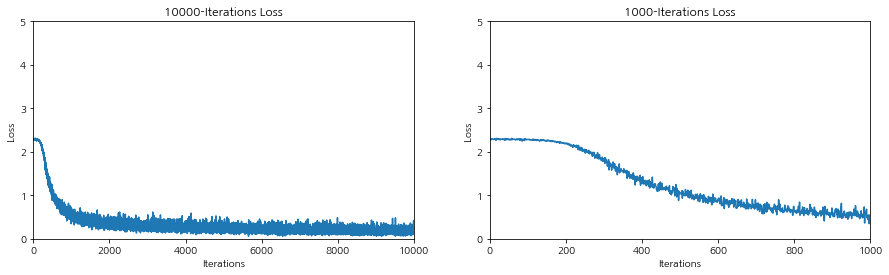

In [62]:
# 손실함수 변화 추이 그래프
# 교재에서는 network.numerical_gradient(x_batch, t_batch) 를 적용한 그래프 이지만, 아래는 network.gradient(x_batch, t_batch) 를 적용한 그래프임
fig, axes = plt.subplots(1, 2, figsize=(15,4))
for iters_num, ax in zip([10000, 1000], axes):
    ax.plot(train_loss_list[:iters_num])
    ax.set_title("{}-Iterations Loss".format(iters_num))
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Loss")
    ax.set_ylim(0, 5)
    ax.set_xlim(0, iters_num)

- 처음 200회 까지는 학습 속도가 매우 느리다가 이후 점점 개선됨

---
### [시험 데이터로 평가하기]

- 신경망 학습에서는 훈련 데이터 외에 데이터를 올바르게 인식하는지를 확인해야 함. 오버피팅(Over-fitting) 방지
- 신경망 학습의 원래 목표는 범용적인 능력을 익히는 것 임. 범용 능력을 평가하기 위해 학습 도중 학습 데이터와 시험 데이터로 정확도를 측정

In [72]:
# MNIST 데이터 셋을 이용한 미니배치 학습 (시험 데이터로 평가하는 기능 추가)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 하이퍼파라미터
iters_num = 10000   # 경사 하강법 반복 회수
train_size = x_train.shape[0]     # 학습 데이터 수
batch_size = 100       # 미니배치 크기 (경사 하강법 1회 학습 시 배치 데이터 크기)
learning_rate = 0.1     # 학습률 (교재에서는 0.01로 되어 있으나, 학습 속도 개선을 위해 0.1로 수정함)

# 1 에폭(epoch) 당 반복 수 : epoch는 하나의 단위를 의미 하며, 1 에폭은 미니배치 반복이 훈련 데이터를 모두 소진 했을 때의 회수에 해당 함
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)        # 계산 속도가 너무 느려서 10,000번 반복 불가
    grad = network.gradient(x_batch, t_batch)       # 오차역전파법 적용하여 개선된 버전
    
    # 매개변수 계산
    for key in ['W1', 'b1', 'W2', 'b2']:
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 에폭 당 정확도 계산
    if ((i % iter_per_epoch == 0) or (i == iters_num - 1)):
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        # 학습 진행경과 출력
        print("{}번째 미니배치 Loss, Train accuracy, Test accuracy : {:.3f},  {:.3f},  {:.3f}".format(i, loss, train_acc, test_acc))

0번째 미니배치 Loss, Train accuracy, Test accuracy : 2.292,  0.090,  0.089
600번째 미니배치 Loss, Train accuracy, Test accuracy : 0.945,  0.772,  0.779
1200번째 미니배치 Loss, Train accuracy, Test accuracy : 0.478,  0.873,  0.878
1800번째 미니배치 Loss, Train accuracy, Test accuracy : 0.336,  0.898,  0.901
2400번째 미니배치 Loss, Train accuracy, Test accuracy : 0.450,  0.908,  0.910
3000번째 미니배치 Loss, Train accuracy, Test accuracy : 0.289,  0.914,  0.916
3600번째 미니배치 Loss, Train accuracy, Test accuracy : 0.217,  0.920,  0.920
4200번째 미니배치 Loss, Train accuracy, Test accuracy : 0.347,  0.923,  0.924
4800번째 미니배치 Loss, Train accuracy, Test accuracy : 0.241,  0.927,  0.928
5400번째 미니배치 Loss, Train accuracy, Test accuracy : 0.151,  0.932,  0.932
6000번째 미니배치 Loss, Train accuracy, Test accuracy : 0.201,  0.935,  0.935
6600번째 미니배치 Loss, Train accuracy, Test accuracy : 0.174,  0.937,  0.938
7200번째 미니배치 Loss, Train accuracy, Test accuracy : 0.217,  0.939,  0.938
7800번째 미니배치 Loss, Train accuracy, Test accuracy : 0.142,  0.941,  0.

(0, 18)

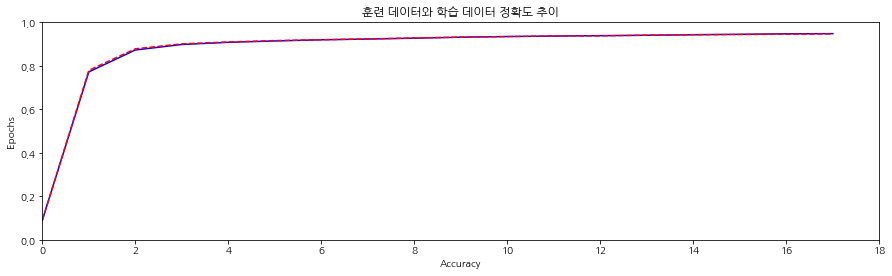

In [77]:
# 훈련 데이터와 시험 데이터에 대한 정확도 추이
fig, ax = plt.subplots(figsize=(15,4))

ax.plot(train_acc_list, c="b")
ax.plot(test_acc_list, "--", c="r")     # 시험 데이터에 대한 정확도는 점선으로 표시(Red 색상)
ax.set_title("훈련 데이터와 학습 데이터 정확도 추이")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Epochs")
ax.set_ylim(0.0, 1.0)
ax.set_xlim(0, len(train_acc_list))

- 학습이 진행될수록 훈련 데이터와 시험 데이터의 정확도가 모두 좋아지고 있고, 두 정확도의 차이가 거의 없으므로 오버피팅 없이 학습이 잘 되고 있음을 알 수 있음
- 오버피팅이 있는 경우는, 훈련데이터의 정확도가 점점 개선되지만, 일정 시점부터 시험 데이터의 정확도가 점차 떨어지기 시작함. <br>
   오버피팅을 막기 위해 가중치 조정, 드롭아웃 등의 예방법을 사용할 수 있음